# Results

## Load data

In [862]:
from pathlib import Path
import pandas as pd
import re
import logging
import seaborn as sns

pd.options.display.precision = 2

In [863]:
conditions = [
    {'label': 'LB', 'mu': 2.3},
    {'label': 'GLU', 'mu': 0.54},
    {'label': 'GLY', 'mu': 0.32},
    {'label': 'GAL', 'mu': 0.17},
    {'label': 'MAN', 'mu': 0.12},
]
mrna_ordered = ['rpoD', 'hipBA', 'rnlAB']
conditions_ordered = [c['label'] for c in conditions]
conditions_ordered

['LB', 'GLU', 'GLY', 'GAL', 'MAN']

In [864]:

logging.basicConfig(format='%(asctime)s [%(levelname)s] %(message)s ', datefmt='%m/%d/%Y %I:%M:%S%p', level=logging.INFO)
rootdir = "../tests/output-seg_ok"
logging.info(f'reading from directory {rootdir}')

10/14/2024 11:46:09AM [INFO] reading from directory ../tests/output-seg_ok 


#### Stacked format

In [865]:
dfs = []
for f in Path(rootdir).glob('*/results.csv.*'):
    logging.info(f'..loading file: {f}')
    df = pd.read_csv(f)
    df['image'] = f.parts[-2]
    dfs.append(df)
df_stacked = pd.concat(dfs)

def split_parts(r):
    return re.compile(f'({"|".join(csources_ordered)})[-_]').split(r['condition'])[1:]

df_stacked[['csource', 'coverslip']] = df_stacked.apply(split_parts, axis=1, result_type='expand')

df_stacked['unique_cell_id'] = df_stacked.apply(lambda r: r['image'] + "." + str(r['image_cell_id']), axis=1)
df_stacked

10/14/2024 11:46:28AM [INFO] ..loading file: ../tests/output-seg_ok/MG1655_GLY-lowOD-2nd_16/results.csv.rnlAB 
10/14/2024 11:46:28AM [INFO] ..loading file: ../tests/output-seg_ok/MG1655_GLY-lowOD-2nd_16/results.csv.hipBA 
10/14/2024 11:46:28AM [INFO] ..loading file: ../tests/output-seg_ok/MG1655_GLY-lowOD-2nd_16/results.csv.rpoD 
10/14/2024 11:46:28AM [INFO] ..loading file: ../tests/output-seg_ok/MG1655_MAN_OD_0.3_left_03/results.csv.rnlAB 
10/14/2024 11:46:28AM [INFO] ..loading file: ../tests/output-seg_ok/MG1655_MAN_OD_0.3_left_03/results.csv.hipBA 
10/14/2024 11:46:28AM [INFO] ..loading file: ../tests/output-seg_ok/MG1655_MAN_OD_0.3_left_03/results.csv.rpoD 
10/14/2024 11:46:28AM [INFO] ..loading file: ../tests/output-seg_ok/MG1655_GLY-lowOD-2nd_17/results.csv.rnlAB 
10/14/2024 11:46:28AM [INFO] ..loading file: ../tests/output-seg_ok/MG1655_GLY-lowOD-2nd_17/results.csv.hipBA 
10/14/2024 11:46:28AM [INFO] ..loading file: ../tests/output-seg_ok/MG1655_GLY-lowOD-2nd_17/results.csv.rpoD

,image_cell_id,spots,dense_regions,decomposed_RNAs,tx,nascent_RNAs,total_RNAs,mrna,strain,condition,seqnr,image,csource,coverslip,unique_cell_id
0,1,0,0,0,0,0,0,rnlAB,MG1655,GLY-lowOD-2nd,16,MG1655_GLY-lowOD-2nd_16,GLY,lowOD-2nd,MG1655_GLY-lowOD-2nd_16.1
1,2,0,0,0,0,0,0,rnlAB,MG1655,GLY-lowOD-2nd,16,MG1655_GLY-lowOD-2nd_16,GLY,lowOD-2nd,MG1655_GLY-lowOD-2nd_16.2
2,3,0,0,0,0,0,0,rnlAB,MG1655,GLY-lowOD-2nd,16,MG1655_GLY-lowOD-2nd_16,GLY,lowOD-2nd,MG1655_GLY-lowOD-2nd_16.3
3,4,0,0,0,0,0,0,rnlAB,MG1655,GLY-lowOD-2nd,16,MG1655_GLY-lowOD-2nd_16,GLY,lowOD-2nd,MG1655_GLY-lowOD-2nd_16.4
4,5,0,0,0,0,0,0,rnlAB,MG1655,GLY-lowOD-2nd,16,MG1655_GLY-lowOD-2nd_16,GLY,lowOD-2nd,MG1655_GLY-lowOD-2nd_16.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,1211,0,0,0,0,0,0,rpoD,MG1655,GAL-lowOD-2nd,6,MG1655_GAL-lowOD-2nd_06,GAL,lowOD-2nd,MG1655_GAL-lowOD-2nd_06.1211
1211,1212,0,0,0,0,0,0,rpoD,MG1655,GAL-lowOD-2nd,6,MG1655_GAL-lowOD-2nd_06,GAL,lowOD-2nd,MG1655_GAL-lowOD-2nd_06.1212
1212,1213,0,0,0,0,0,0,rpoD,MG1655,GAL-lowOD-2nd,6,MG1655_GAL-lowOD-2nd_06,GAL,lowOD-2nd,MG1655_GAL-lowOD-2nd_06.1213
1213,1214,0,0,0,0,0,0,rpoD,MG1655,GAL-lowOD-2nd,6,MG1655_GAL-lowOD-2nd_06,GAL,lowOD-2nd,MG1655_GAL-lowOD-2nd_06.1214


In [866]:
# inspect data
df_stacked.columns

Index(['image_cell_id', 'spots', 'dense_regions', 'decomposed_RNAs', 'tx',
       'nascent_RNAs', 'total_RNAs', 'mrna', 'strain', 'condition', 'seqnr',
       'image', 'csource', 'coverslip', 'unique_cell_id'],
      dtype='object')

In [867]:
csources = df_stacked['csource'].unique()
strains = df_stacked['strain'].unique()
seqnrs = df_stacked['seqnr'].unique() 
mrnas = df_stacked['mrna'].unique() 
csources, strains, seqnrs, mrnas

(array(['GLY', 'MAN', 'GLU', 'LB', 'GAL'], dtype=object),
 array(['MG1655'], dtype=object),
 array([16,  3, 17,  2,  1,  5,  8,  7, 12,  6]),
 array(['rnlAB', 'hipBA', 'rpoD'], dtype=object))

#### Record format

In [868]:
dfs = []
for f in Path(rootdir).glob('*/results.csv'):
    logging.info(f'..loading file: {f}')
    df = pd.read_csv(f)
    df['image'] = f.parts[-2]
    dfs.append(df)
df_records = pd.concat(dfs)

def split_parts(r):
    return re.compile(f'({"|".join(csources_ordered)})[-_]').split(r['condition'])[1:]

df_records[['csource', 'coverslip']] = df_records.apply(split_parts, axis=1, result_type='expand')

df_records['unique_cell_id'] = df_records.apply(lambda r: r['image'] + "." + str(r['image_cell_id']), axis=1)
df_records 

10/14/2024 11:46:34AM [INFO] ..loading file: ../tests/output-seg_ok/MG1655_GLY-lowOD-2nd_16/results.csv 
10/14/2024 11:46:34AM [INFO] ..loading file: ../tests/output-seg_ok/MG1655_MAN_OD_0.3_left_03/results.csv 
10/14/2024 11:46:34AM [INFO] ..loading file: ../tests/output-seg_ok/MG1655_GLY-lowOD-2nd_17/results.csv 
10/14/2024 11:46:34AM [INFO] ..loading file: ../tests/output-seg_ok/MG1655_GLU_OD_0.3_left_02/results.csv 
10/14/2024 11:46:34AM [INFO] ..loading file: ../tests/output-seg_ok/MG1655_GLU_OD_0.3_left_03/results.csv 
10/14/2024 11:46:34AM [INFO] ..loading file: ../tests/output-seg_ok/MG1655_LB_fixed2806_hybed1906_left_01/results.csv 
10/14/2024 11:46:34AM [INFO] ..loading file: ../tests/output-seg_ok/MG1655_GAL-lowOD-2nd_05/results.csv 
10/14/2024 11:46:34AM [INFO] ..loading file: ../tests/output-seg_ok/MG1655_MAN_OD_0.3_left_08/results.csv 
10/14/2024 11:46:34AM [INFO] ..loading file: ../tests/output-seg_ok/MG1655_MAN_OD_0.3_left_07/results.csv 
10/14/2024 11:46:34AM [INFO] ..

,image_cell_id,bbox-0,bbox-1,bbox-2,bbox-3,area,eccentricity,nuclei,spots_hipBA,dense_regions_hipBA,...,tx_rpoD,nascent_RNAs_rpoD,total_RNAs_rpoD,strain,condition,seqnr,image,csource,coverslip,unique_cell_id
0,1,0,132,13,166,288.0,0.91,0,0,0,...,0,0,1,MG1655,GLY-lowOD-2nd,16,MG1655_GLY-lowOD-2nd_16,GLY,lowOD-2nd,MG1655_GLY-lowOD-2nd_16.1
1,2,0,166,26,199,501.0,0.70,0,0,0,...,0,0,2,MG1655,GLY-lowOD-2nd,16,MG1655_GLY-lowOD-2nd_16,GLY,lowOD-2nd,MG1655_GLY-lowOD-2nd_16.2
2,3,0,285,15,305,253.0,0.66,0,0,0,...,0,0,2,MG1655,GLY-lowOD-2nd,16,MG1655_GLY-lowOD-2nd_16,GLY,lowOD-2nd,MG1655_GLY-lowOD-2nd_16.3
3,4,0,352,37,382,509.0,0.90,0,0,0,...,0,0,4,MG1655,GLY-lowOD-2nd,16,MG1655_GLY-lowOD-2nd_16,GLY,lowOD-2nd,MG1655_GLY-lowOD-2nd_16.4
4,5,3,724,23,734,62.0,0.96,0,0,0,...,0,0,0,MG1655,GLY-lowOD-2nd,16,MG1655_GLY-lowOD-2nd_16,GLY,lowOD-2nd,MG1655_GLY-lowOD-2nd_16.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,1211,2266,1445,2297,1471,456.0,0.89,0,0,0,...,0,0,0,MG1655,GAL-lowOD-2nd,6,MG1655_GAL-lowOD-2nd_06,GAL,lowOD-2nd,MG1655_GAL-lowOD-2nd_06.1211
1211,1212,2268,1274,2291,1299,366.0,0.84,0,0,0,...,0,0,0,MG1655,GAL-lowOD-2nd,6,MG1655_GAL-lowOD-2nd_06,GAL,lowOD-2nd,MG1655_GAL-lowOD-2nd_06.1212
1212,1213,2268,1749,2293,1765,235.0,0.90,0,0,0,...,0,0,0,MG1655,GAL-lowOD-2nd,6,MG1655_GAL-lowOD-2nd_06,GAL,lowOD-2nd,MG1655_GAL-lowOD-2nd_06.1213
1213,1214,2287,196,2303,207,133.0,0.79,0,0,0,...,0,0,0,MG1655,GAL-lowOD-2nd,6,MG1655_GAL-lowOD-2nd_06,GAL,lowOD-2nd,MG1655_GAL-lowOD-2nd_06.1214





## Counts

### Number of cells per csource:

In [869]:
df_records.groupby(['strain', 'csource'])['unique_cell_id'].nunique()

strain  csource
MG1655  GAL        3634
        GLU        6900
        GLY        3572
        LB         3825
        MAN        2501
Name: unique_cell_id, dtype: int64

### Number of cells per csource per image:

In [870]:
df_records.groupby(['strain', 'csource', 'seqnr'])['unique_cell_id'].nunique()

strain  csource  seqnr
MG1655  GAL      1        1516
                 5         903
                 6        1215
        GLU      1        2776
                 2        2200
                 3        1924
        GLY      8        1655
                 16        506
                 17       1411
        LB       1        1158
                 3        1399
                 5        1268
        MAN      3         538
                 7         760
                 8         594
                 12        609
Name: unique_cell_id, dtype: int64

### Number of spots per csource:


In [871]:
df_stacked.groupby(['strain', 'csource', 'mrna'])['total_RNAs'].sum()


strain  csource  mrna 
MG1655  GAL      hipBA      225
                 rnlAB      170
                 rpoD      2599
        GLU      hipBA      282
                 rnlAB     2942
                 rpoD      8632
        GLY      hipBA      110
                 rnlAB      253
                 rpoD      4504
        LB       hipBA      692
                 rnlAB     2786
                 rpoD     13913
        MAN      hipBA       86
                 rnlAB       34
                 rpoD       852
Name: total_RNAs, dtype: int64

### Number of spots per csource per image:

In [872]:
df_stacked.groupby(['strain', 'csource', 'seqnr', 'mrna'])['total_RNAs'].sum()

strain  csource  seqnr  mrna 
MG1655  GAL      1      hipBA      51
                        rnlAB     109
                        rpoD      850
                 5      hipBA     144
                        rnlAB       6
                        rpoD      628
                 6      hipBA      30
                        rnlAB      55
                        rpoD     1121
        GLU      1      hipBA     207
                        rnlAB    1588
                        rpoD     3827
                 2      hipBA      38
                        rnlAB     852
                        rpoD     2726
                 3      hipBA      37
                        rnlAB     502
                        rpoD     2079
        GLY      8      hipBA      56
                        rnlAB     112
                        rpoD     2168
                 16     hipBA       8
                        rnlAB      45
                        rpoD      727
                 17     hipBA      46
                    

In [789]:
df_stacked.groupby(['strain', 'csource', 'seqnr', 'mrna']).size()

strain  csource  seqnr  mrna 
MG1655  GAL      1      hipBA    1516
                        rnlAB    1516
                        rpoD     1516
                 5      hipBA     903
                        rnlAB     903
                        rpoD      903
                 6      hipBA    1215
                        rnlAB    1215
                        rpoD     1215
        GLU      1      hipBA    2776
                        rnlAB    2776
                        rpoD     2776
                 2      hipBA    2200
                        rnlAB    2200
                        rpoD     2200
                 3      hipBA    1924
                        rnlAB    1924
                        rpoD     1924
        GLY      8      hipBA    1655
                        rnlAB    1655
                        rpoD     1655
                 16     hipBA     506
                        rnlAB     506
                        rpoD      506
                 17     hipBA    1411
                    

In [790]:
# Normalize by cell counts
cell_counts = df_stacked.groupby(['strain', 'csource', 'seqnr', 'mrna']).size()
mrna_counts = df_stacked.groupby(['strain', 'csource', 'seqnr', 'mrna'])['total_RNAs'].sum()
frequencies = mrna_counts / cell_counts
frequencies.name = "frequencies"
frequencies


strain  csource  seqnr  mrna 
MG1655  GAL      1      hipBA    3.36e-02
                        rnlAB    7.19e-02
                        rpoD     5.61e-01
                 5      hipBA    1.59e-01
                        rnlAB    6.64e-03
                        rpoD     6.95e-01
                 6      hipBA    2.47e-02
                        rnlAB    4.53e-02
                        rpoD     9.23e-01
        GLU      1      hipBA    7.46e-02
                        rnlAB    5.72e-01
                        rpoD     1.38e+00
                 2      hipBA    1.73e-02
                        rnlAB    3.87e-01
                        rpoD     1.24e+00
                 3      hipBA    1.92e-02
                        rnlAB    2.61e-01
                        rpoD     1.08e+00
        GLY      8      hipBA    3.38e-02
                        rnlAB    6.77e-02
                        rpoD     1.31e+00
                 16     hipBA    1.58e-02
                        rnlAB    8.89e-02
    

In [799]:
# this no work: needs a dataframe, but agg result is a series
df_stacked.groupby(['strain', 'csource', 'seqnr', 'mrna'])[['csource', 'mrna']].size().boxplot()

AttributeError: 'Series' object has no attribute 'boxplot'

### Sanity check indices:

In [800]:
df_records.groupby(['strain', 'csource', 'seqnr'])['image_cell_id'].agg(["min", "max"])


min   max
strain csource seqnr           
MG1655 GAL     1        1  1516
               5        1   903
               6        1  1215
       GLU     1        1  2776
               2        1  2200
               3        1  1924
       GLY     8        1  1655
               16       1   506
               17       1  1411
       LB      1        1  1158
               3        1  1399
               5        1  1268
       MAN     3        1   538
               7        1   760
               8        1   594
               12       1   609

In [801]:
df_stacked.groupby(['strain', 'csource', 'seqnr'])['image_cell_id'].agg(["min", "max"])


min   max
strain csource seqnr           
MG1655 GAL     1        1  1516
               5        1   903
               6        1  1215
       GLU     1        1  2776
               2        1  2200
               3        1  1924
       GLY     8        1  1655
               16       1   506
               17       1  1411
       LB      1        1  1158
               3        1  1399
               5        1  1268
       MAN     3        1   538
               7        1   760
               8        1   594
               12       1   609

## Histograms

In [802]:
palette = {
    'rpoD': 'magenta',
    'hipBA': '#00d6ae',
    'rnlAB': '#d2d100',
}

### Cell area:

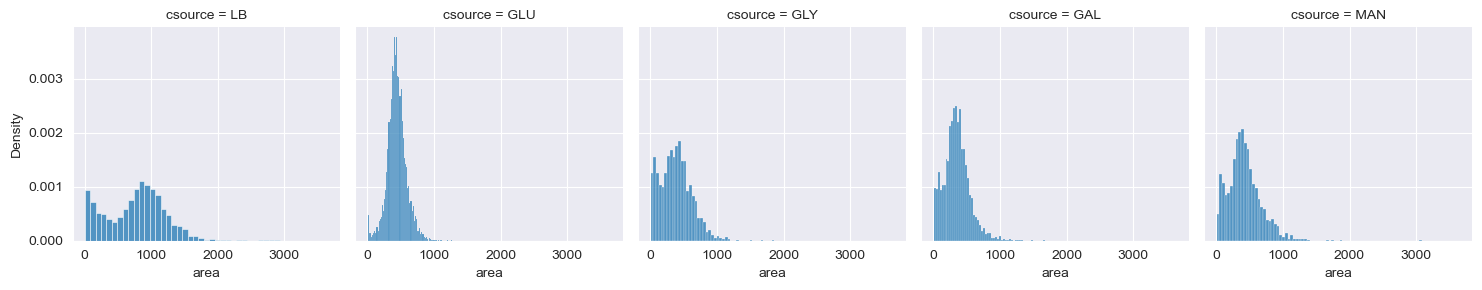

In [803]:
g = sns.FacetGrid(df_records, col='csource', col_order=csources_ordered)
g.map_dataframe(sns.histplot, x='area', stat='density');

### Cell eccentricity:

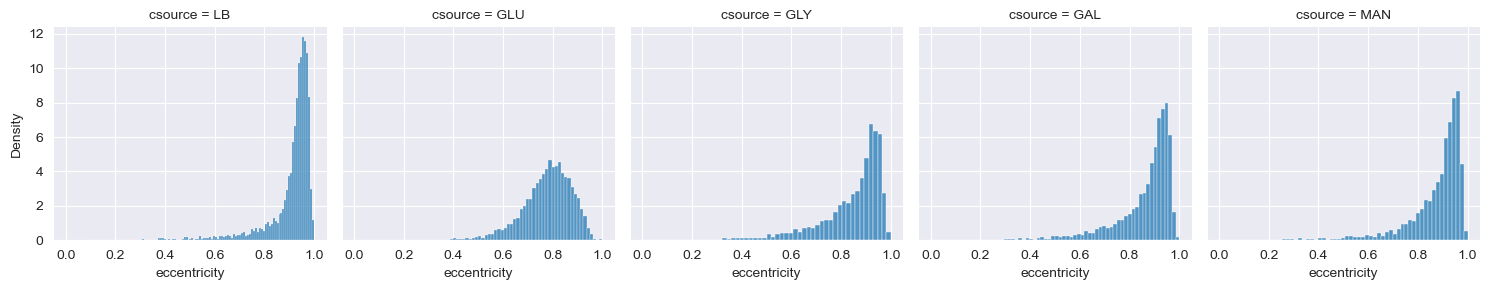

In [804]:
g = sns.FacetGrid(df_records, col='csource', col_order=csources_ordered)
g.map_dataframe(sns.histplot, x='eccentricity', stat='density');

### mRNAs per cell:

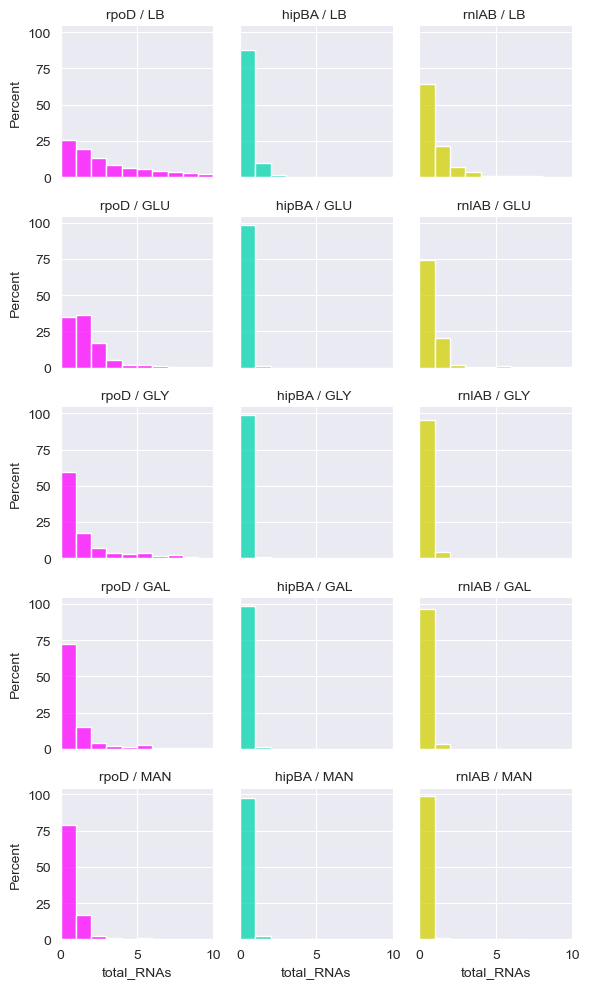

In [806]:
g = sns.FacetGrid(df_stacked, col='mrna', col_order=mrna_ordered, row='csource', row_order=csources_ordered, 
                  xlim=(0, 10), sharex=True, sharey=True, hue='mrna', palette=palette, height=2);
g.map_dataframe(sns.histplot, x='total_RNAs', binwidth=1, stat='percent')
g.set_titles('{col_name} / {row_name} ');

### Cells with both RNAs

In [861]:
df_counts = pd.DataFrame({
    'total': df_records.groupby('csource').size().reindex(csources_ordered),
    'rpoD': df_records.query('spots_rpoD > 0').groupby('csource').size().reindex(csources_ordered),
    'rnlAB': df_records.query('spots_rnlAB > 0').groupby('csource').size().reindex(csources_ordered),
    'hipBA': df_records.query('spots_hipBA > 0').groupby('csource').size().reindex(csources_ordered),
    'rnlAB&hipBA': df_records.query('spots_rnlAB > 0').query('spots_hipBA > 0').groupby('csource').size().reindex(csources_ordered),
    'rnlAB&rpoD': df_records.query('spots_rnlAB > 0').query('spots_rpoD > 0').groupby('csource').size().reindex(csources_ordered),
    'hipBA&rpoD': df_records.query('spots_hipBA > 0').query('spots_rpoD > 0').groupby('csource').size().reindex(csources_ordered),
})

df_counts['%rpoD'] = df_counts['rpoD'] / df_counts['total']
df_counts['%rnlAB'] = df_counts['rnlAB'] / df_counts['total']
df_counts['%hipBA'] = df_counts['hipBA'] / df_counts['total']
df_counts['%rnlAB*%hipBA'] = df_counts['%rnlAB'] * df_counts['%hipBA']
df_counts['%rnlAB&hipBA'] = df_counts['rnlAB&hipBA'] / df_counts['total']
df_counts['%rnlAB&rpoD'] = df_counts['rnlAB&rpoD'] / df_counts['total']
df_counts['%hipBA&rpoD'] = df_counts['hipBA&rpoD'] / df_counts['total']
df_counts = df_counts[['total', 'rpoD', '%rpoD', 'hipBA', '%hipBA', 'rnlAB', '%rnlAB', '%rnlAB*%hipBA', '%rnlAB&hipBA', '%rnlAB&rpoD', '%hipBA&rpoD']]
df_counts

,total,rpoD,%rpoD,hipBA,%hipBA,rnlAB,%rnlAB,%rnlAB*%hipBA,%rnlAB&hipBA,%rnlAB&rpoD,%hipBA&rpoD
csource,,,,,,,,,,,
LB,3825,2836,0.74,459,1.20e-01,1377,3.60e-01,4.32e-02,8.55e-02,3.36e-01,1.14e-01
GLU,6900,4493,0.65,110,1.59e-02,1795,2.60e-01,4.15e-03,6.81e-03,2.08e-01,1.16e-02
GLY,3572,1445,0.40,33,9.24e-03,156,4.37e-02,4.03e-04,3.08e-03,3.25e-02,7.00e-03
GAL,3634,1009,0.28,54,1.49e-02,134,3.69e-02,5.48e-04,4.40e-03,1.95e-02,6.60e-03
MAN,2501,530,0.21,61,2.44e-02,24,9.60e-03,2.34e-04,2.40e-03,6.40e-03,8.80e-03


In [836]:
# both TA systems expressing
s = df_records.query('spots_rnlAB > 0').query('spots_hipBA > 0').groupby('csource').size() / df_records.groupby('csource').size()
s.reindex(csources_ordered)

csource
LB     8.55e-02
GLU    6.81e-03
GLY    3.08e-03
GAL    4.40e-03
MAN    2.40e-03
dtype: float64

In [841]:
# rnlAB and rpoD
s = df_records.query('spots_rnlAB > 0').query('spots_rpoD > 0').groupby('csource').size() / df_records.groupby('csource').size()
s.reindex(csources_ordered)

csource
LB     3.36e-01
GLU    2.08e-01
GLY    3.25e-02
GAL    1.95e-02
MAN    6.40e-03
dtype: float64

In [842]:
# hipBA and rpoD
s = df_records.query('spots_hipBA > 0').query('spots_rpoD > 0').groupby('csource').size() / df_records.groupby('csource').size()
s.reindex(csources_ordered)

csource
LB     1.14e-01
GLU    1.16e-02
GLY    7.00e-03
GAL    6.60e-03
MAN    8.80e-03
dtype: float64

In [837]:
# rnlAB only
s = df_records.query('spots_rnlAB > 0').groupby('csource').size() / df_records.groupby('csource').size()
s.reindex(csources_ordered)

csource
LB     3.60e-01
GLU    2.60e-01
GLY    4.37e-02
GAL    3.69e-02
MAN    9.60e-03
dtype: float64

In [839]:
# hipBA only
s = df_records.query('spots_hipBA > 0').groupby('csource').size() / df_records.groupby('csource').size()
s.reindex(csources_ordered)

csource
LB     1.20e-01
GLU    1.59e-02
GLY    9.24e-03
GAL    1.49e-02
MAN    2.44e-02
dtype: float64

In [840]:
# rpoD only
s = df_records.query('spots_rpoD > 0').groupby('csource').size() / df_records.groupby('csource').size()
s.reindex(csources_ordered)

csource
LB     0.74
GLU    0.65
GLY    0.40
GAL    0.28
MAN    0.21
dtype: float64

### Txs per cell:

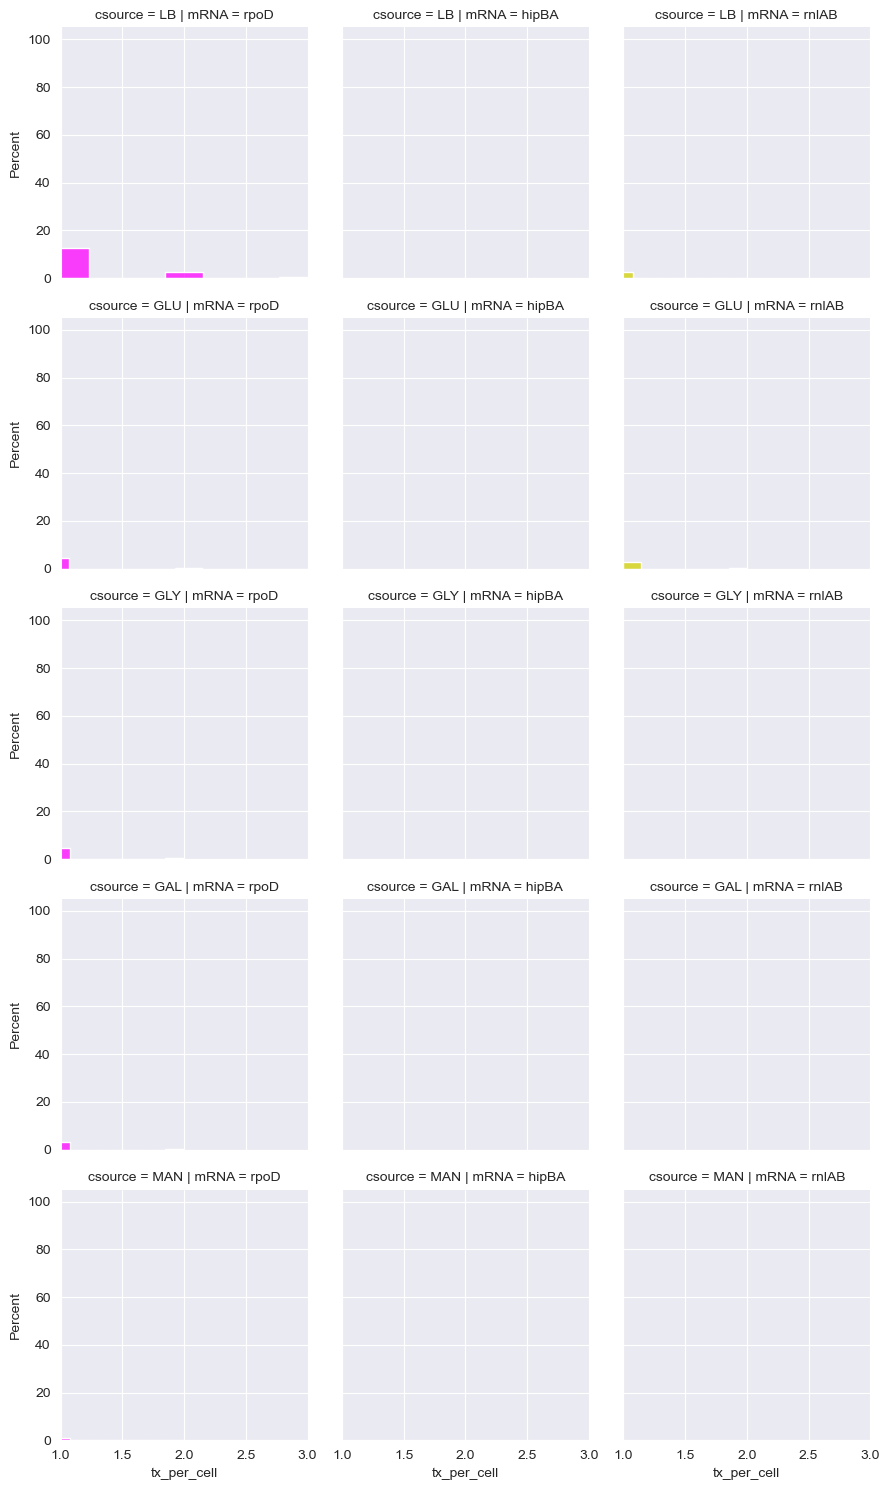

In [429]:
g = sns.FacetGrid(df, col='mRNA', col_order=mrna_ordered, row='csource', row_order=csources_ordered, 
                  xlim=(1, 3), sharex=True, sharey=True, hue='mRNA', palette=palette);
g.map_dataframe(sns.histplot, x='tx_per_cell', stat='percent');


### Inspect images individually:

In [406]:
np.sort(df['image'].unique())

array(['MG1655_GAL-lowOD-2nd_01', 'MG1655_GAL-lowOD-2nd_05',
       'MG1655_GAL-lowOD-2nd_06', 'MG1655_GLU_OD_0.3_left_01',
       'MG1655_GLU_OD_0.3_left_02', 'MG1655_GLU_OD_0.3_left_03',
       'MG1655_GLY-lowOD-2nd_08', 'MG1655_GLY-lowOD-2nd_16',
       'MG1655_GLY-lowOD-2nd_17', 'MG1655_LB_fixed2806_hybed1906_left_01',
       'MG1655_LB_fixed2806_hybed1906_left_03',
       'MG1655_LB_fixed2806_hybed1906_left_05',
       'MG1655_MAN_OD_0.3_left_03', 'MG1655_MAN_OD_0.3_left_07',
       'MG1655_MAN_OD_0.3_left_08', 'MG1655_MAN_OD_0.3_left_12'],
      dtype=object)

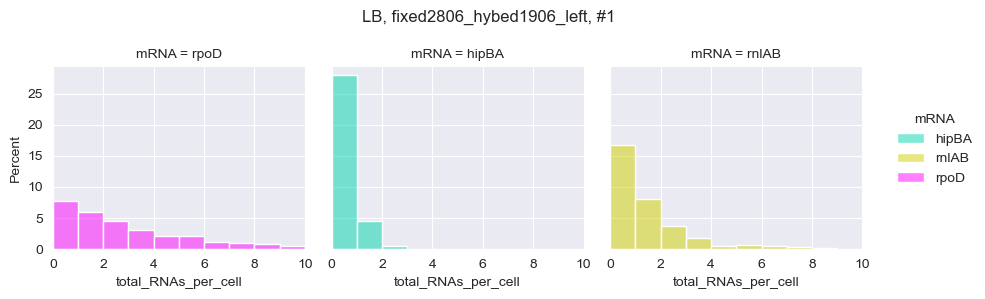

In [421]:
image = 'MG1655_LB_fixed2806_hybed1906_left_01'
data = df.query('image == @image')

fields = data.iloc[0, :].to_dict()
title = f"{fields['csource']}, {fields['coverslip']}, #{fields['seqnr']}"

g = sns.displot(data=data, x='total_RNAs_per_cell', col='mRNA', col_order=mrna_ordered, binwidth=1, stat='percent',
                hue='mRNA', palette=palette, height=3, facet_kws={'xlim': [0, 10], 'sharex': True, 'sharey':True})
g.fig.suptitle(title)
g.tight_layout();

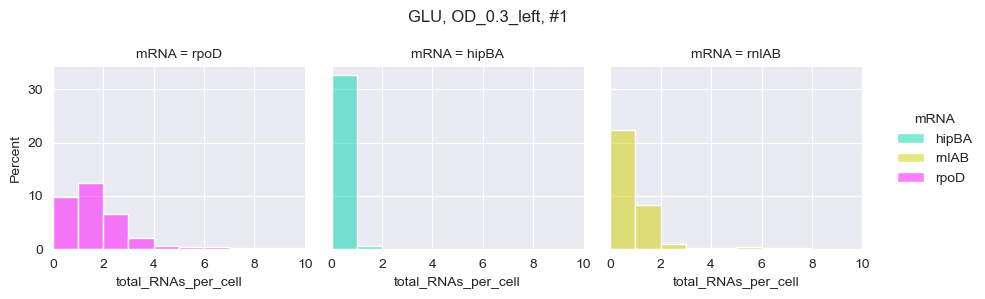

In [422]:
image = 'MG1655_GLU_OD_0.3_left_01'
data = df.query('image == @image')

fields = data.iloc[0, :].to_dict()
title = f"{fields['csource']}, {fields['coverslip']}, #{fields['seqnr']}"

g = sns.displot(data=data, x='total_RNAs_per_cell', col='mRNA', col_order=mrna_ordered, binwidth=1, stat='percent',
                hue='mRNA', palette=palette, height=3, facet_kws={'xlim': [0, 10], 'sharex': True, 'sharey':True})
g.fig.suptitle(title)
g.tight_layout();

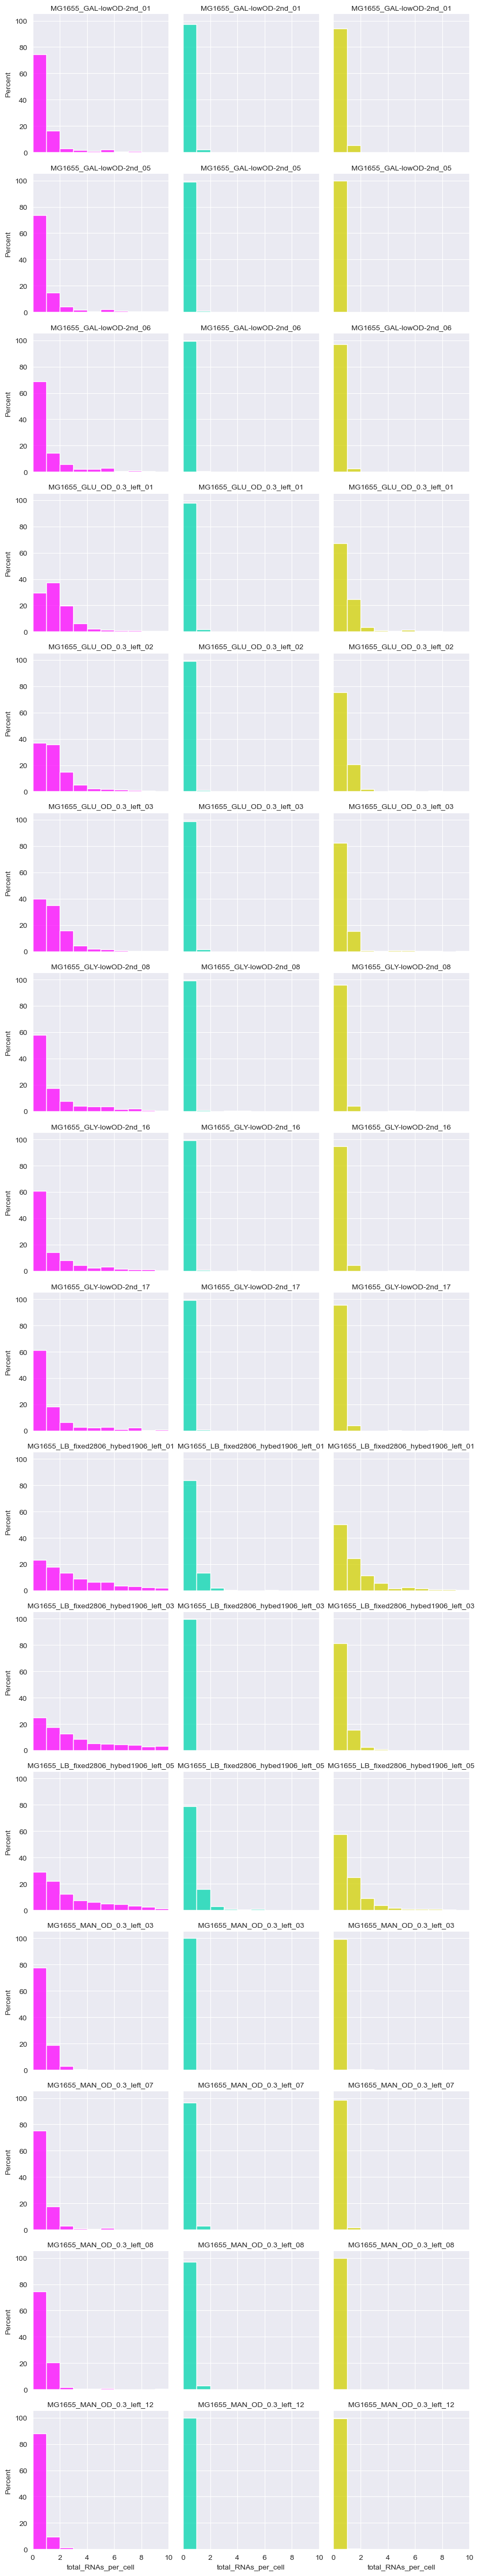

In [423]:
g = sns.FacetGrid(df, col='mRNA', col_order=mrna_ordered, row='image', row_order=np.sort(df['image'].unique()),
                  xlim=(0, 10), sharex=True, sharey=True, hue='mRNA', palette=palette, height=3)
g.set_titles("{row_name}")
g.map_dataframe(sns.histplot, x='total_RNAs_per_cell', binwidth=1, stat='percent');

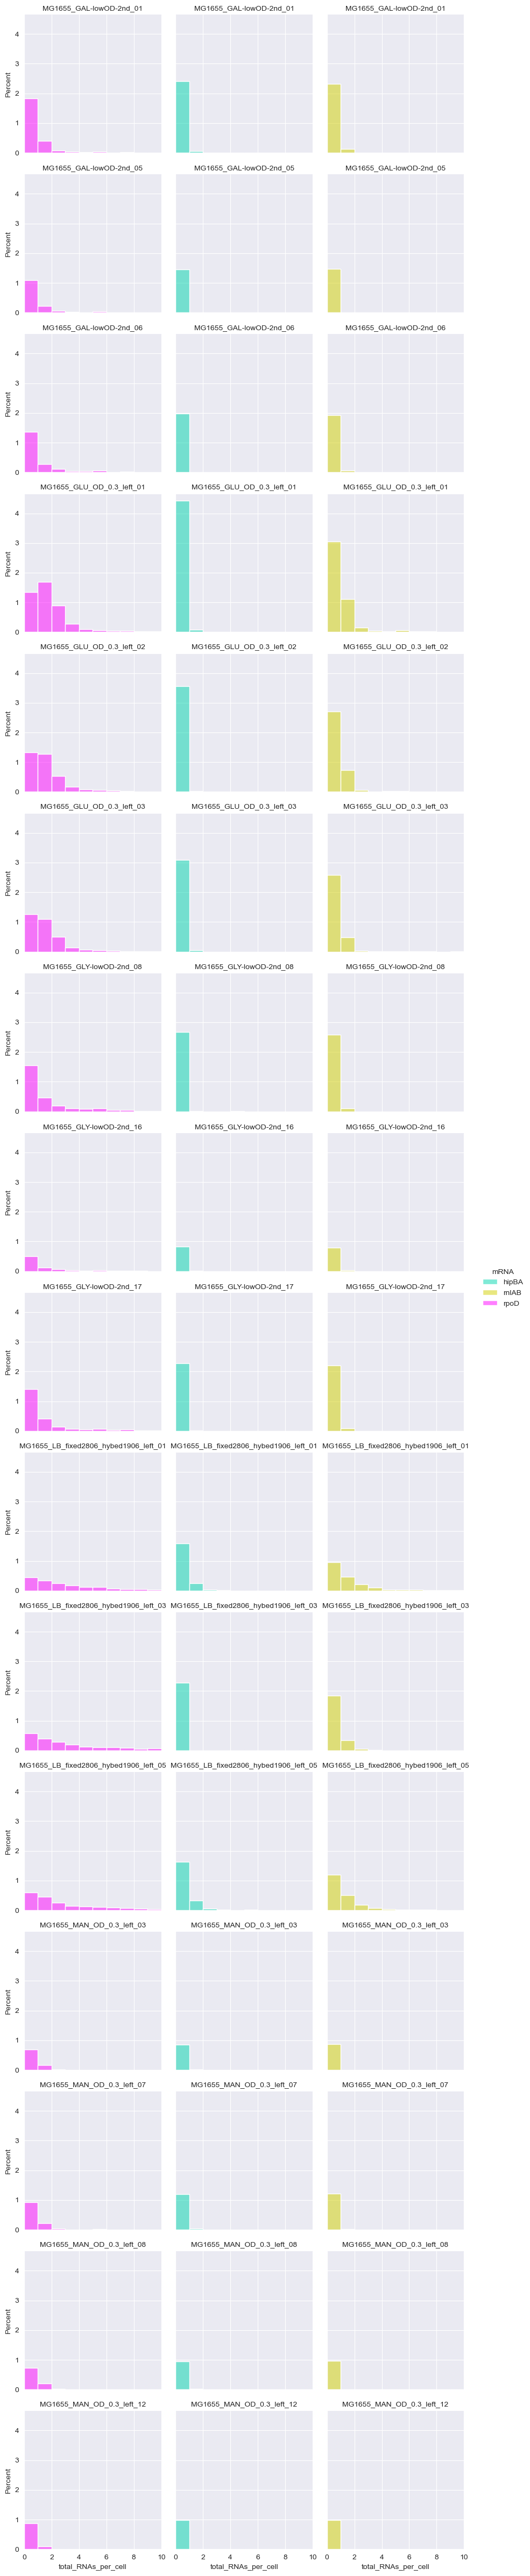

In [431]:
# doesn't work
g = sns.displot(df, x='total_RNAs_per_cell', binwidth=1, stat='percent', 
            col='mRNA', col_order=mrna_ordered, hue='mRNA',
            row='image',  row_order=np.sort(df['image'].unique()),
            height=3, palette=palette,
            facet_kws={'xlim': [0, 10], 'sharex': True, 'sharey':True})
g.set_titles("{row_name}");